## Final Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex/part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Home Price Analysis 

In [1]:
# Add Graphic 

## Project Overview 

For this project, I sought to explore how certain housing characteristics influence the price of a home in King county. Specifically, I used linear regression to show how specific housing characteristics impact the price of the home.

## Business Problem and Stakeholder

A real estate company in King County wants to increase customer acquisition and retention by providing transparent and useful information regarding the sales prices of homes. Utilizing this data, they can assist customers/clients that are both looking to buy or sell a home, understand what to budget for with a new home or what to expect to sell their current home for. For the project specifically we will be exploring which housing characteristics are the most important and have the biggest impact on sales price.

## Data Understanding 

In [14]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Data Preparation

In [3]:
#Loading dataset
kc_house_df = pd.read_csv("data/kc_house_data.csv")
kc_house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,PRIVATE,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220
7,7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
8,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
9,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305


In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Above I have read in the file and previewed the head of the dataset along with utilizing .info() to get a general idea of the dataset. We have a total of over 30,000 data points with very low amounts of missing values. With low amounts of missing values, I plan to drop all rows with missing values. It looks like we have 25 columns that have types that include integers, floats, and objects. Looking at the columns and data types it seems we have several numerical values and catergorical values. I may need to transform some variables but that will be determined as I explore more into the data.

In [26]:
#Dropping all rows with null values and dropping duplicate values/rows

#may chose to drop lat, long and address 
kc_house_df.dropna(inplace= True)
kc_house_df = kc_house_df.drop_duplicates()
#kc_house_df.drop(["id"], axis = 1, inplace = True)
#kc_house_df.drop(["lat"], axis = 1, inplace = True)
#kc_house_df.drop(["long"], axis = 1, inplace = True)
#kc_house_df.drop(["address"], axis = 1, inplace = True)
kc_house_df.drop(["date"], axis = 1, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30039 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30039 non-null  float64
 1   bedrooms       30039 non-null  int64  
 2   bathrooms      30039 non-null  float64
 3   sqft_living    30039 non-null  int64  
 4   sqft_lot       30039 non-null  int64  
 5   floors         30039 non-null  float64
 6   waterfront     30039 non-null  object 
 7   greenbelt      30039 non-null  object 
 8   nuisance       30039 non-null  object 
 9   view           30039 non-null  object 
 10  condition      30039 non-null  object 
 11  grade          30039 non-null  object 
 12  heat_source    30039 non-null  object 
 13  sewer_system   30039 non-null  object 
 14  sqft_above     30039 non-null  int64  
 15  sqft_basement  30039 non-null  int64  
 16  sqft_garage    30039 non-null  int64  
 17  sqft_patio     30039 non-null  int64  
 18  yr_bui

Duplicates and null values were dropped along with the id column as this column is not needed. The columns date, lat, long and address were dropped as well as these columns are not of the focus for this analysis. Called .info() to confirm changes. We now have a total of 30,039 entries regarding home sales with 20 columns. 

In [27]:
#Inspecting value counts for all variables
for col in kc_house_df:
    print(kc_house_df[col].value_counts(), "\n")

650000.0     345
750000.0     305
800000.0     297
600000.0     295
850000.0     294
            ... 
903888.0       1
576200.0       1
1081500.0      1
2698000.0      1
720902.0       1
Name: price, Length: 5193, dtype: int64 

3     12736
4      9585
2      3911
5      2794
6       498
1       378
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 

2.5     8463
2.0     7331
1.0     4541
3.0     4115
3.5     2262
1.5     1805
4.0      643
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
7.0       12
7.5       12
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64 

1250    192
1400    190
1560    183
1900    183
1540    181
       ... 
2409      1
360       1
2281      1
2265      1
2049      1
Name: sqft_living, Length: 1304, dtype: int64 

5000     485
6000     402
4000     373
7200     301
7500     181
        ... 
8893       1
33855      1
49857      1
6858       1
4098   

A couple observations that were found were that there were some homes with 0 bedrooms and also 0 or 0.5 bathrooms. When looking at homes we would expect a home to have at least 1 bedroom and 1 full bathroom. To further prepare the data I will gather data from rows where homes have at least 1 bedroom and 1 full bathroom.  

In [28]:
# Dropping rows with bathrooms and bedrooms less than 1
kc_house_df = kc_house_df[kc_house_df["bedrooms"] >= 1]
kc_house_df = kc_house_df[kc_house_df["bathrooms"] >= 1]
print(kc_house_df["bedrooms"].value_counts(), kc_house_df["bathrooms"].value_counts())

print(kc_house_df.info())

3     12736
4      9585
2      3911
5      2794
6       498
1       378
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 2.5     8463
2.0     7331
1.0     4541
3.0     4115
3.5     2262
1.5     1805
4.0      643
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
7.0       12
7.5       12
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30039 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30039 non-null  float64
 1   bedrooms       30039 non-null  int64  
 2   bathrooms      30039 non-null  float64
 3   sqft_living    30039 non-null  int64  
 4   sqft_lot       30039 non-null  int64  
 5   floors         30039 non-null  float64
 6   waterfront     30039 non-null  object 
 7   greenbelt      30039 non-null  object 
 

In [29]:
kc_house_df['price'].value_counts()

650000.0     345
750000.0     305
800000.0     297
600000.0     295
850000.0     294
            ... 
903888.0       1
576200.0       1
1081500.0      1
2698000.0      1
720902.0       1
Name: price, Length: 5193, dtype: int64

## Data Analysis

In [30]:
# Finding which factors correlate most with price
kc_house_df.corr()["price"]

price            1.000000
bedrooms         0.294595
bathrooms        0.485761
sqft_living      0.614927
sqft_lot         0.086093
floors           0.181273
sqft_above       0.544404
sqft_basement    0.246901
sqft_garage      0.267251
sqft_patio       0.315616
yr_built         0.096180
yr_renovated     0.086190
Name: price, dtype: float64

Looking at the correlations of the current numeric variables we see that the top 3 highest correlates are:
- Sqft_living: highest correlation at 0.61
- Sqft_above: 2nd highest correlation at 0.54
- Bathrooms (# of bathrooms): 3rd highest correlation of 0.48

Other noteable characteristics correlations include:
- Bedrooms (# of bedrooms): correlation of 0.29
- Floors (number of floors/levels): correlation of 0.18
- Yr_built: correlation of 0.096

Square footage having the highest correlation does seem appropropriate. Surprisingly number of bedrooms was not among the highest charactristics regarding correlation, however it does show a positive but weak correlation. 

In [37]:
kc_numerics = kc_house_df[['sqft_living', 'floors', 'bathrooms','bedrooms', 'price']].copy()
kc_numerics.head()

,sqft_living,floors,bathrooms,bedrooms,price
0,1180,1.0,1.0,4,675000.0
1,2770,1.0,2.5,5,920000.0
2,2880,1.0,2.0,6,311000.0
3,2160,2.0,3.0,3,775000.0
4,1120,2.0,2.0,2,592500.0


In [38]:
#creating subset with desired predictor variables 
kc_preds = kc_numerics.drop('price', axis= 1)
kc_target = kc_numerics['price']
kc_preds.head()

,sqft_living,floors,bathrooms,bedrooms
0,1180,1.0,1.0,4
1,2770,1.0,2.5,5
2,2880,1.0,2.0,6
3,2160,2.0,3.0,3
4,1120,2.0,2.0,2


In [39]:
# use sm.add_constant() to add constant term/y-intercept
predictors = sm.add_constant(kc_preds)
predictors

,const,sqft_living,floors,bathrooms,bedrooms
0,1.0,1180,1.0,1.0,4
1,1.0,2770,1.0,2.5,5
2,1.0,2880,1.0,2.0,6
3,1.0,2160,2.0,3.0,3
4,1.0,1120,2.0,2.0,2
...,...,...,...,...,...
30150,1.0,1910,1.5,2.0,5
30151,1.0,2020,2.0,2.0,3
30152,1.0,1620,1.0,2.0,3
30153,1.0,2570,2.0,2.5,3


In [40]:
#fitting the model 
model = sm.OLS(kc_target, predictors).fit()

In [41]:
#getting the model summary to see how mdel does
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4938.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:08:12   Log-Likelihood:            -4.4655e+05
No. Observations:               30039   AIC:                         8.931e+05
Df Residuals:                   30034   BIC:                         8.932e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.49e+05   1.74e+04     14.352      0.000    2.15e+05    2.83e+05
sqft_living   621.5901      6.958     89.336      0.000     607.952     635.228
floors      -4.921e+04   7787.176     -6.320      0.000   -6.45e+04    -3.4e+04
bathrooms    7.872e+04   7613.155     10.340      0.000    6.38e+04    9.36e+04
bedrooms    -1.648e+05   5469.372    -30.140      0.000   -1.76e+05   -1.54e+05
==============================================================================
Omnibus:                    42809.159   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48246654.613
Skew:                           7.992   Prob(JB):                         0.00
Kurtosis:                     198.683   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Creating a subset to further explore sqft_living, floors, bathrooms, bedrooms with sales price
kc_subset = kc_house_df[['sqft_living', 'floors', 'bathrooms','bedrooms', 'price']].copy()
kc_subset

,sqft_living,floors,bathrooms,bedrooms,price
0,1180,1.0,1.0,4,675000.0
1,2770,1.0,2.5,5,920000.0
2,2880,1.0,2.0,6,311000.0
3,2160,2.0,3.0,3,775000.0
4,1120,2.0,2.0,2,592500.0
...,...,...,...,...,...
30150,1910,1.5,2.0,5,1555000.0
30151,2020,2.0,2.0,3,1313000.0
30152,1620,1.0,2.0,3,800000.0
30153,2570,2.0,2.5,3,775000.0


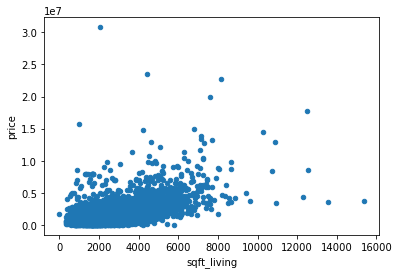

In [10]:
# Plotting sqft_living on a scatter plot to explore visual relationship
# between sqft_living and price
kc_subset.plot(x="sqft_living", y="price", kind="scatter");

In [11]:
results = sm.OLS(kc_subset["price"], sm.add_constant(kc_subset[["sqft_living"]])).fit()
results.params

const         -80756.921151
sqft_living      562.526086
dtype: float64

Above we can see that sqft_living does seem to have a linear relationship.

Above we set sqft_living as the independent variable and and price as the dependent variable. We observe an intercept of -80756.921 and a sqft_living coefficient of 562.526. 

Our interpretation of these values indicate that if a house's sqft_living was 0 (house with no square footage) the price would be -80756.92 dollars.  

The model also indicates that for every 1 square foot increase in the sqft_living area, we can expect an increase of $562.53 in the price of the house. 

const          1.328658e-16
sqft_living    0.000000e+00
dtype: float64


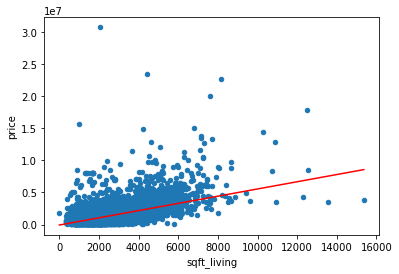

In [12]:
fig, ax = plt.subplots();
kc_subset.plot(x="sqft_living", y="price", kind="scatter", ax=ax)

# set up line data representing linear regression model
x = np.linspace(kc_subset["sqft_living"].min(), kc_subset["sqft_living"].max())
y = x * results.params["sqft_living"] + results.params["const"]

# plot model on the same axes as the data
ax.plot(x, y, color="red");

print(results.pvalues)

Compared to a standard alpha of 0.05, these are quite small p-values from our model. This means that both our intercept and our slope are statistically significant for the model of the variables sqft_living and price.

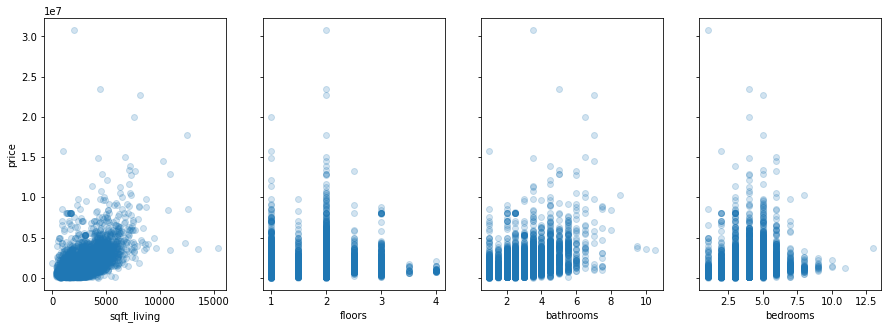

In [13]:
#plotting to visualize all 4 variables of sqft_living, floors, bathrooms, and bedrooms with sales price
fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=True)
axes[0].set_ylabel("price")

for i, col in enumerate(kc_subset.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(kc_subset[col], kc_subset["price"], alpha=0.2)
    ax.set_xlabel(col)

As mentioned above we see that sqft_living does seem to have a linear relationship. Looking at the other 3, floors, bathrooms, and bedrooms, we can determine that these are catergorical discrete variables. 

## Modeling 

## Regression Results 

## Conclusion/ Recommendations

## Limitations